01_eda.ipynb (EDA dan Preprocessing)
Fokus: Memahami data, membersihkan, dan menyiapkan fitur.

Jumlah nilai nol pada kolom kritis:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


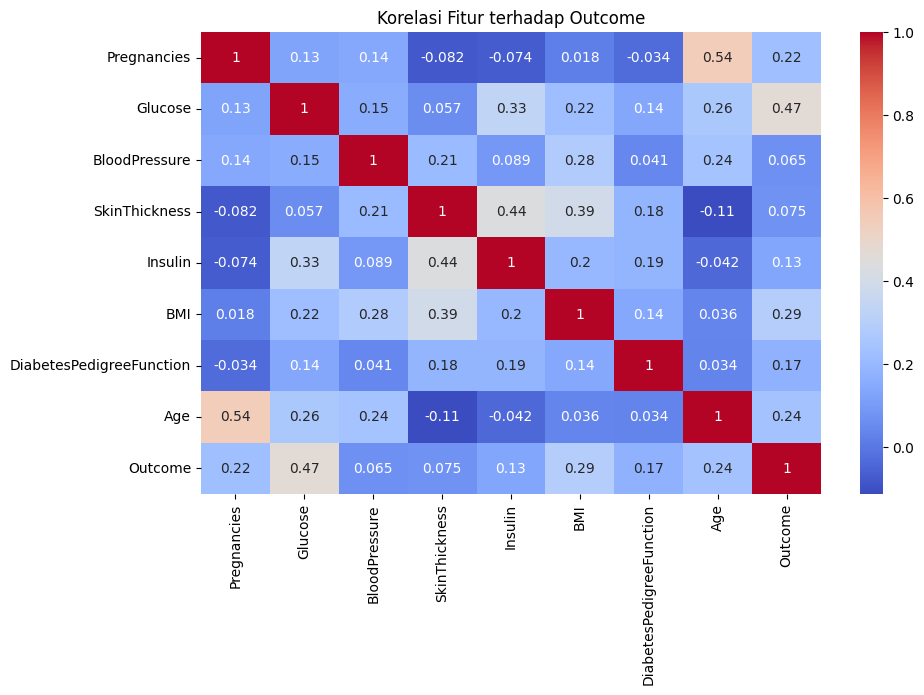

Data bersih berhasil disimpan ke 'diabetes_cleaned.csv'


In [9]:
# --- SEL 1: Load Data ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/raw/diabetes.csv')

# --- SEL 2: Data Quality Check ---
# Cek nilai 0 yang tidak wajar
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("Jumlah nilai nol pada kolom kritis:")
print((df[cols_with_zeros] == 0).sum())

# --- SEL 3: Visualisasi Insight (EDA) ---
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur terhadap Outcome")
plt.show()

# --- SEL 4: Preprocessing & Cleaning ---
# Handling missing values dengan median
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

# --- SEL 5: Scaling ---
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Simpan data yang sudah bersih untuk notebook selanjutnya
X_scaled['Outcome'] = y.values
X_scaled.to_csv('../data/processed/diabetes_cleaned.csv', index=False)
print("Data bersih berhasil disimpan ke 'diabetes_cleaned.csv'")